<a href="https://colab.research.google.com/github/zswzy/MachineLearning/blob/master/PUBG_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 下载并提取 Kaggle 的data

In [0]:
!pip install kaggle
!mkdir .kaggle
import json
token = {"username":"clovea","key":"2a1323f31d13e0b68a7ff0ed65a3abbd"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!kaggle competitions download -c pubg-finish-placement-prediction -p /content
!unzip \train_V2.csv.zip
#!unzip \test_V2.csv.zip
#!unzip \sample_submission_V2.csv.zip

mkdir: cannot create directory ‘.kaggle’: File exists
- path is now set to: {/content}
 94% 230M/244M [00:01<00:00, 114MB/s]
100% 244M/244M [00:02<00:00, 123MB/s]
 84% 84.0M/100M [00:01<00:00, 34.8MB/s]
100% 100M/100M [00:01<00:00, 54.8MB/s] 
 29% 5.00M/17.0M [00:00<00:00, 47.1MB/s]
100% 17.0M/17.0M [00:00<00:00, 82.9MB/s]
Archive:  train_V2.csv.zip
  inflating: train_V2.csv            


最后得到了三个文件：train_V2.csv, test_V2.csv, sample_submission_V2.csv


# 文件的基础读取

In [1]:
import pandas as pd
Data = pd.read_csv('train_V2.csv')
print('Data size:',Data.shape)

Data size: (4446966, 29)


In [2]:
Data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,2.299759e+01,1.579506e+03,4.450467e+01,4.300759e+01,8.920105e+02,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587399e+02,2.382811e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [3]:
Data.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,0,1,1,18.44,1395,squad-fpp,28,28,1418,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,1262,0,0,0.00,1316,squad-fpp,28,28,-1,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,1000,0,0,0.00,1967,solo-fpp,96,92,-1,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,0,0,0,0.00,1375,squad,28,27,1493,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,0,0,0,0.00,1930,squad,29,27,1349,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143


In [4]:
Data.dtypes

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

# 所有特征描述
Data fields
- DBNOs - Number of enemy players knocked.
- assists - Number of enemy players this player damaged that were killed by teammates.
- boosts - Number of boost items used.
- damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
- headshotKills - Number of enemy players killed with headshots.
- heals - Number of healing items used.
- Id - Player’s Id
- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- killStreaks - Max number of enemy players killed in a short amount of time.
- kills - Number of enemy players killed.
- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- matchDuration - Duration of match in seconds.
- matchId - ID to identify match. There are no matches that are in both the training and testing set.
- matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- revives - Number of times this player revived teammates.
rideDistance - Total distance traveled in vehicles measured in meters.
- roadKills - Number of kills while in a vehicle.
- swimDistance - Total distance traveled by swimming measured in meters.
- teamKills - Number of times this player killed a teammate.
vehicleDestroys - Number of vehicles destroyed.
- walkDistance - Total distance traveled on foot measured in meters.
weaponsAcquired - Number of weapons picked up.
- winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- numGroups - Number of groups we have data for in the match.
maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# 消除无效数据，消除ID列，并提取单人模式的训练集

In [5]:
Data = Data.dropna(axis = 0)
data = Data.drop(['Id','groupId','matchId'],axis = 1)
data = data[(Data['matchType'] == ('solo' or 'solo-fpp'))]
data = data.drop(['matchType'],axis = 1) #最终清洗之后的数据集
print('data_size:',data.shape)

data_size: (181943, 25)


In [6]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,181943.000000,181943.000000,181943.000000,181943.0,181943.000000,181943.000000,181943.000000,181943.000000,181943.000000,181943.000000,181943.000000,181943.000000,181943.000000,181943.000000,181943.000000,181943.0,181943.000000,181943.000000,181943.000000,181943.000000,181943.000000,181943.000000,181943.000000,181943.000000,181943.000000
mean,0.055616,1.066048,112.615132,0.0,0.223823,1.012130,46.172224,407.839994,0.870932,0.442908,20.699467,1676.379306,91.344449,87.286568,978.527786,0.0,640.980032,0.009948,5.878082,0.014994,0.007530,986.208330,3.757353,536.936843,0.473814
std,0.245147,1.825299,159.219277,0.0,0.635332,2.445998,28.002309,557.630996,1.498986,0.566226,48.369202,256.175861,16.330166,18.865600,734.524548,0.0,1630.249019,0.139290,38.338833,0.121528,0.089693,1054.842835,2.547345,722.073902,0.307803
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,950.000000,11.000000,1.000000,-1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1431.000000,93.000000,89.000000,-1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,114.000000,2.000000,0.000000,0.204100
50%,0.000000,0.000000,65.730000,0.0,0.000000,0.000000,46.000000,0.000000,0.000000,0.000000,0.000000,1771.000000,96.000000,92.000000,1494.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,607.700000,3.000000,0.000000,0.468100
75%,0.000000,2.000000,159.600000,0.0,0.000000,1.000000,70.000000,1032.000000,1.000000,1.000000,15.910000,1903.000000,97.000000,94.000000,1510.000000,0.0,1.157500,0.000000,0.000000,0.000000,0.000000,1616.000000,5.000000,1492.000000,0.742300
max,4.000000,24.000000,2490.000000,0.0,19.000000,49.000000,100.000000,1962.000000,21.000000,18.000000,1001.000000,2237.000000,100.000000,99.000000,2857.000000,0.0,33970.000000,18.000000,1606.000000,1.000000,3.000000,15370.000000,52.000000,1892.000000,1.000000


# 数据可视化，相关程度分析

## 胜率的大致分布

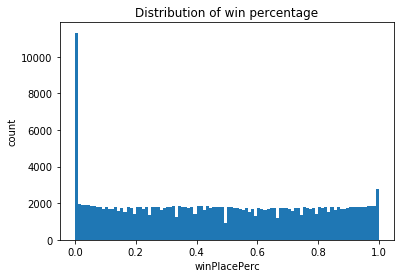

In [7]:
import matplotlib.pyplot as plt
plt.hist(data["winPlacePerc"], bins=100)
plt.title('Distribution of win percentage')
plt.xlabel('winPlacePerc')
plt.ylabel('count');

## 各种特征与胜率之间的相关程度

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


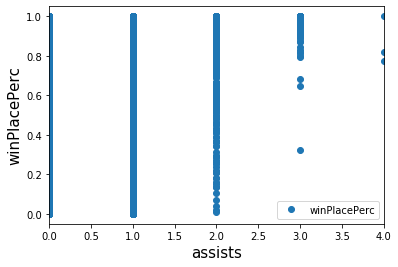

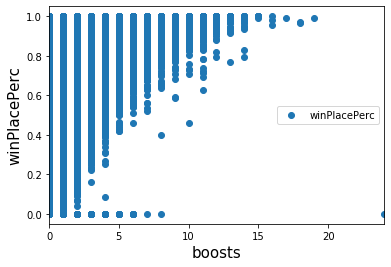

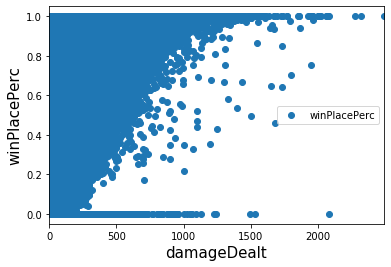

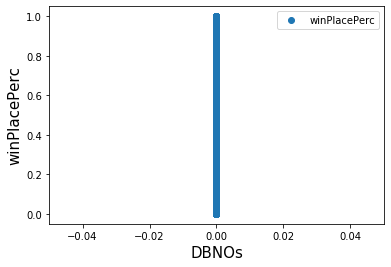

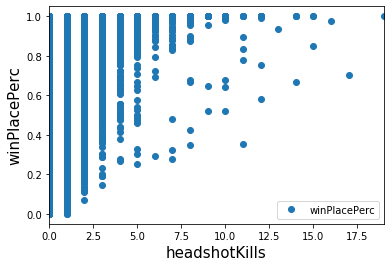

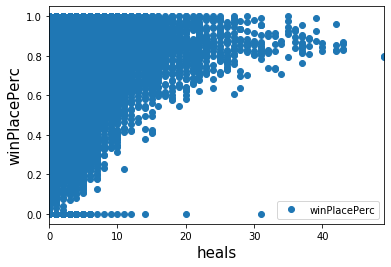

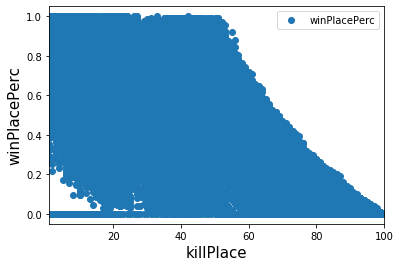

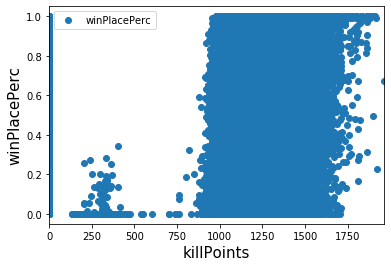

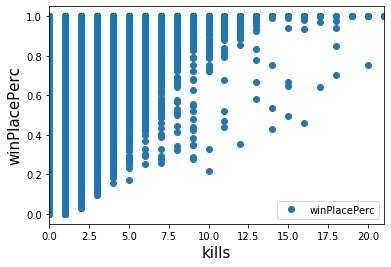

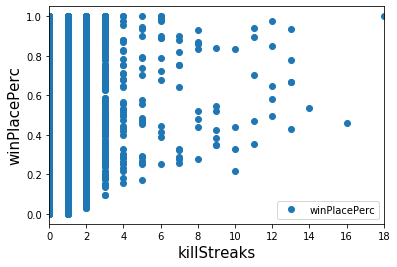

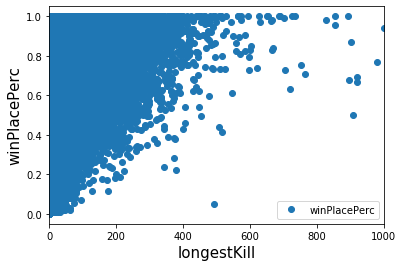

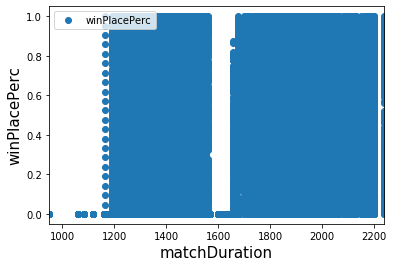

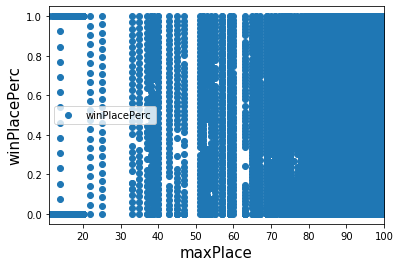

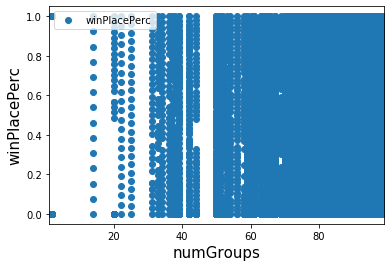

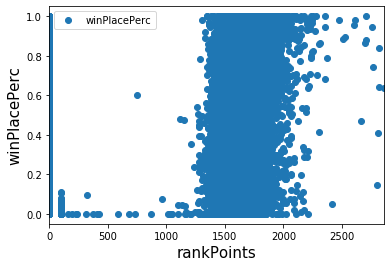

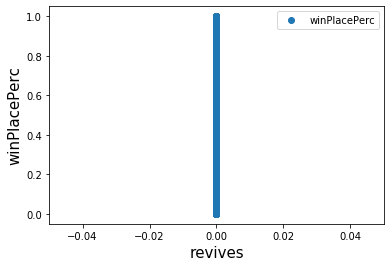

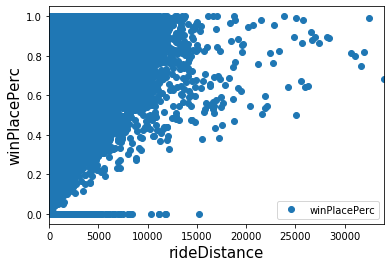

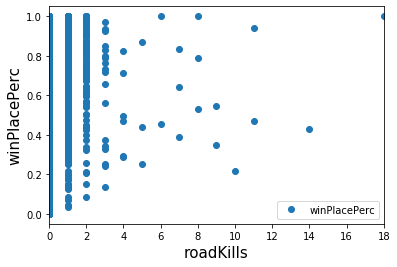

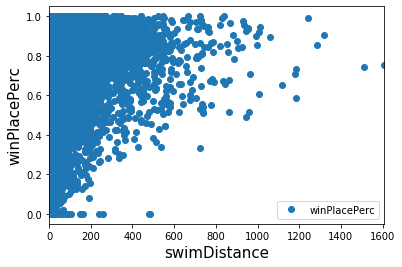

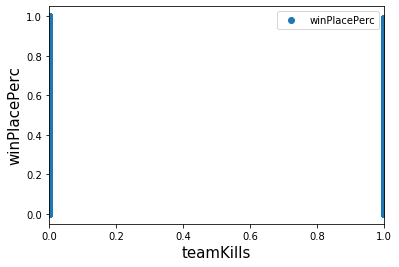

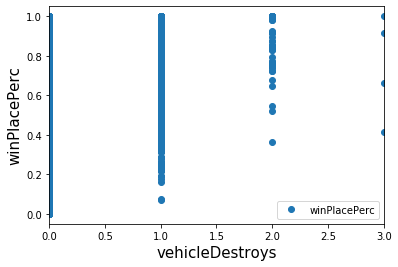

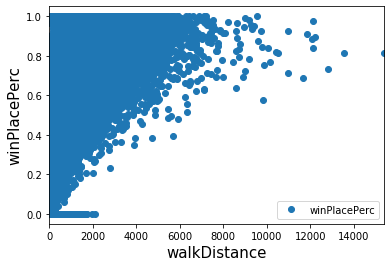

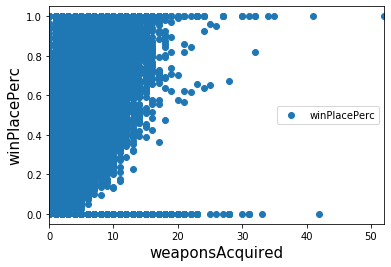

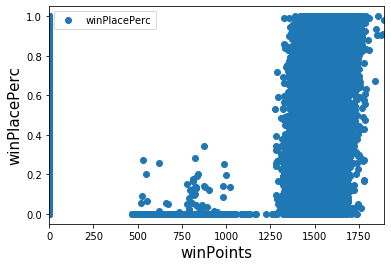

In [8]:
feature_names=data.keys()[:-1]
for u in feature_names:
    fig = data.plot(x=u, y="winPlacePerc", style="o")
    fig.set_ylabel("winPlacePerc", fontsize=15)
    fig.set_xlabel(u, fontsize=15)

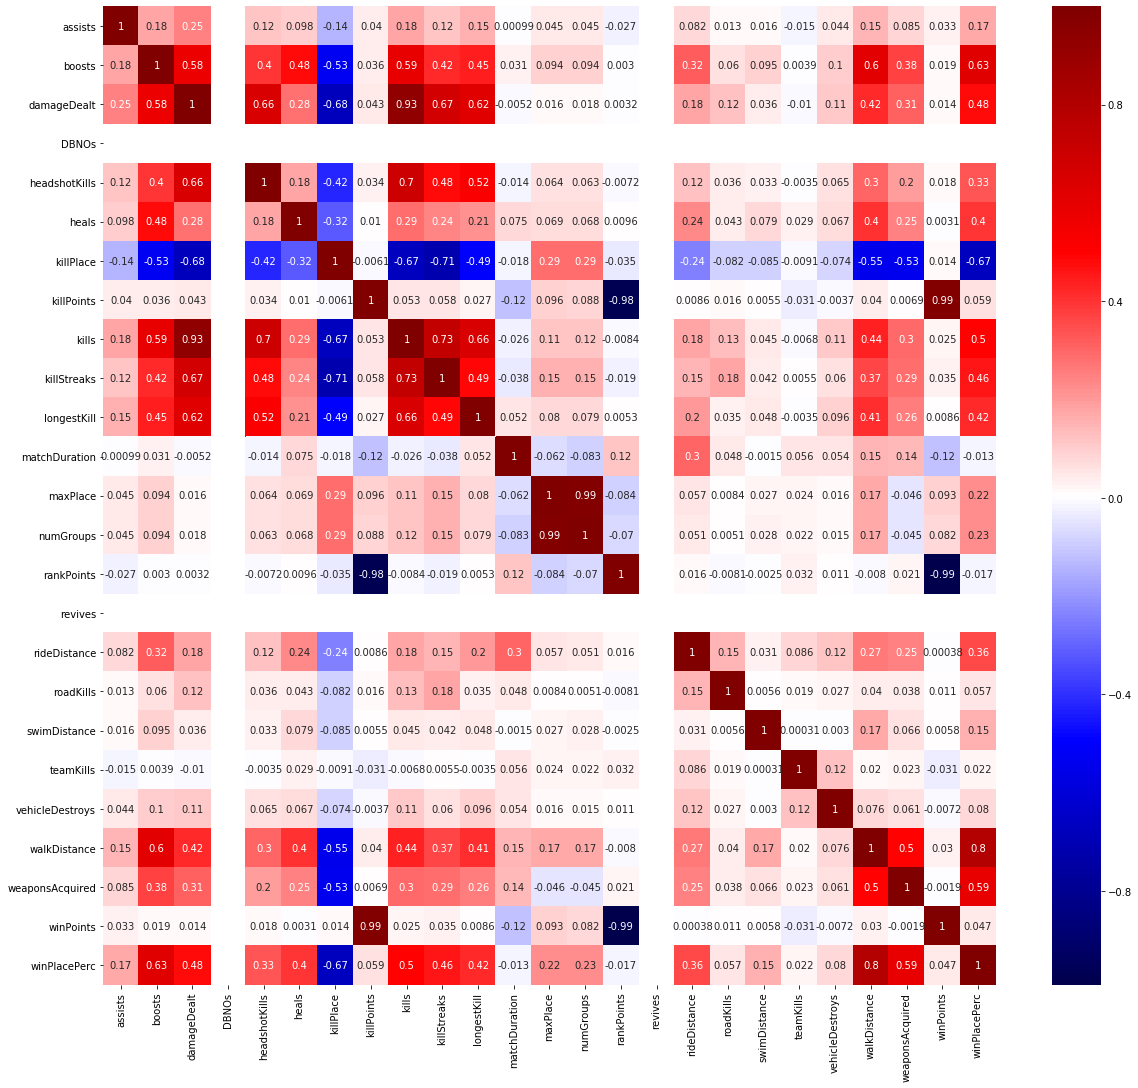

In [9]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 18))
sns.heatmap(data.corr(), cmap='seismic', annot=True, ax=ax)

# PCA分析

## 分离训练集和测试集，并且标准化

In [74]:
train_size = int(len(data)*0.9)
#这里并没有打乱数据集，只是简单的线性划分
X_train = data.drop(['winPlacePerc'],axis = 1)[0:train_size]
X_test = data.drop(['winPlacePerc'],axis = 1)[train_size:]
y_train = data['winPlacePerc'][0:train_size]
y_test = data['winPlacePerc'][train_size:]

m_train = X_train.mean(axis = 0)
m_test = X_test.mean(axis = 0)

X0_train = X_train - m_train
X0_test = X_test - m_test
print('normalized train set shape:',X0_train.shape)
print('normalized test set shape:',X0_test.shape)

normalized train set shape: (163748, 24)
normalized test set shape: (18195, 24)


## $X^0_{train} = USV^T$

$XX^T = US^2U^T$ \\
$X^TX = VS^2V^T$ \\
$Z^0_{train} = f(X^0_{train}) = X^0_{train} V_h^T \in \mathbb{R}^{n \times h}$ , where $V_h \in \mathbb{R}^{h\times d}$. \\
$g(Z^0_{train}) = Z^0_{train} V_h$

In [75]:
import numpy as np
U,S,Vh=np.linalg.svd(X0_train, full_matrices = False)
V = Vh.transpose()
print("Shape U:", U.shape)
print("Shape S:", S.shape)
print("Shape V:", V.shape)

Shape U: (163748, 24)
Shape S: (24,)
Shape V: (24, 24)


## 保持 $S$ 90%的能量

In [92]:
threshold= np.sum(S**2) *0.9
index=0
while True :
    if np.sum(S[:index]**2)>=threshold:
        break
    else:
        index += 1

#index = 15 #这里可以手动调整特征值数目
Sigma=S[:index]
Sigma_new=np.diag(S[:index])
U_new=U[:,:index]
V_new=V[:index,:]
Xnew_train=np.dot(X0_train,V_new.T)

print('The original singular values:',S)
print('The original energy:',np.dot(S,S))
print('We choose %d first singular value.' %(index))
print('new energy:',np.dot(Sigma,Sigma))
#print('Sigma_new:',Sigma_new)
print('Shape of Xnew_train:',Xnew_train.shape)

The original singular values: [6.74607715e+05 4.72436593e+05 4.02061277e+05 9.79782543e+04
 5.94626032e+04 3.86810811e+04 1.94407362e+04 1.54048840e+04
 1.47324636e+04 1.09909903e+04 5.60286409e+03 9.04376810e+02
 8.17792953e+02 6.92737272e+02 4.83227758e+02 2.22652717e+02
 1.61714931e+02 1.16794192e+02 9.37873034e+01 5.45953659e+01
 4.93089381e+01 3.53258336e+01 1.72413663e-11 4.38138482e-14]
The original energy: 855563736071.698
We choose 15 first singular value.
new energy: 855563631248.8656
Shape of Xnew_train: (163748, 15)


# 随便弄一个简单的回归模型

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
Xnew_test = np.dot(X0_test,V_new.T)
reg = LinearRegression().fit(Xnew_train, y_train)
y_train_predict = reg.predict(Xnew_train)
y_test_predict = reg.predict(Xnew_test)
MSE_train = mean_squared_error(y_train,y_train_predict)
MSE_test = mean_squared_error(y_test,y_test_predict)

print('coef:',reg.coef_,'intercept:',reg.intercept_)
print('MSE_train:',MSE_train,'MSE_test:',MSE_test)

coef: [ 0.01992613  0.016421    0.08588234 -0.01399046 -0.15760975 -0.00240234
 -0.08113944  0.01954457 -0.19030694  0.040577    0.01330397 -0.70225038
 -0.0677669  -0.07257455  0.0075082 ] intercept: 0.4742402740796855
MSE_train: 0.014589144162784095 MSE_test: 0.01423257013235144
